# 시각화 모듈(라이브러리)

- Matplotlib
- seaborn 


## seaborn 

In [1]:
import seaborn as sns 

In [2]:
#### seaborn에서 제공하는 데이터셋

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

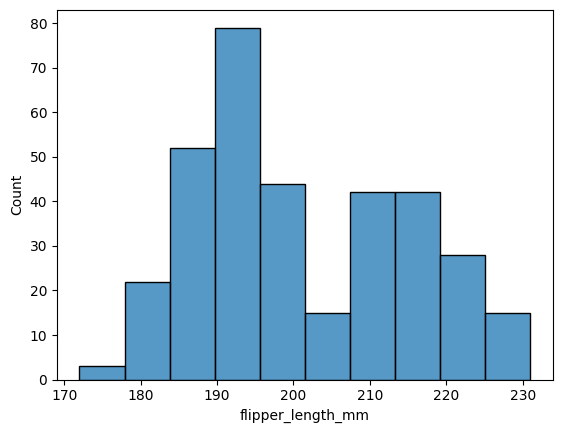

In [3]:
#### histplot(1) 
# histogram
sns.histplot(data=penguins, x='flipper_length_mm')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

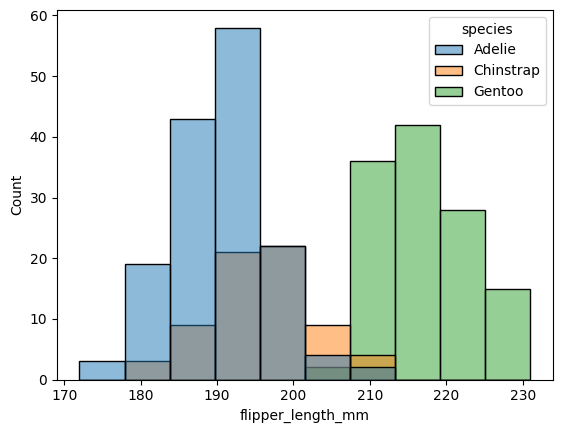

In [4]:
#### histplot(2)
# histogram 
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')

<Axes: xlabel='body_mass_g', ylabel='Count'>

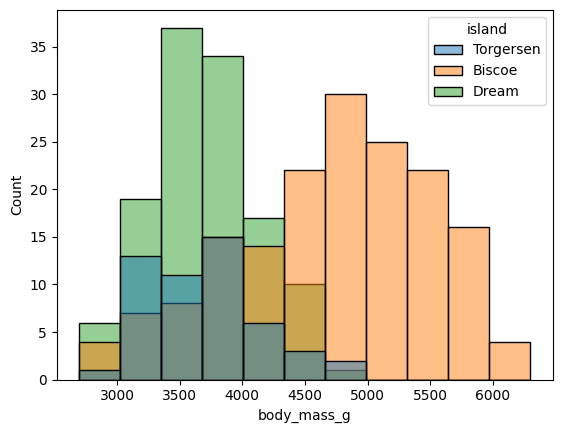

In [9]:
#### histplot(3)
# histogram
sns.histplot(data=penguins, x='body_mass_g', hue='island')

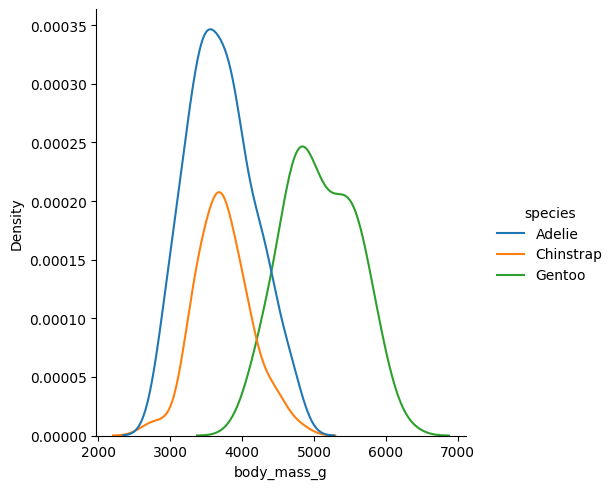

In [14]:
#### displot(1)
# distribution

sns.displot(data=penguins, x='body_mass_g', hue='species', kind='kde') # 커널밀도추정 

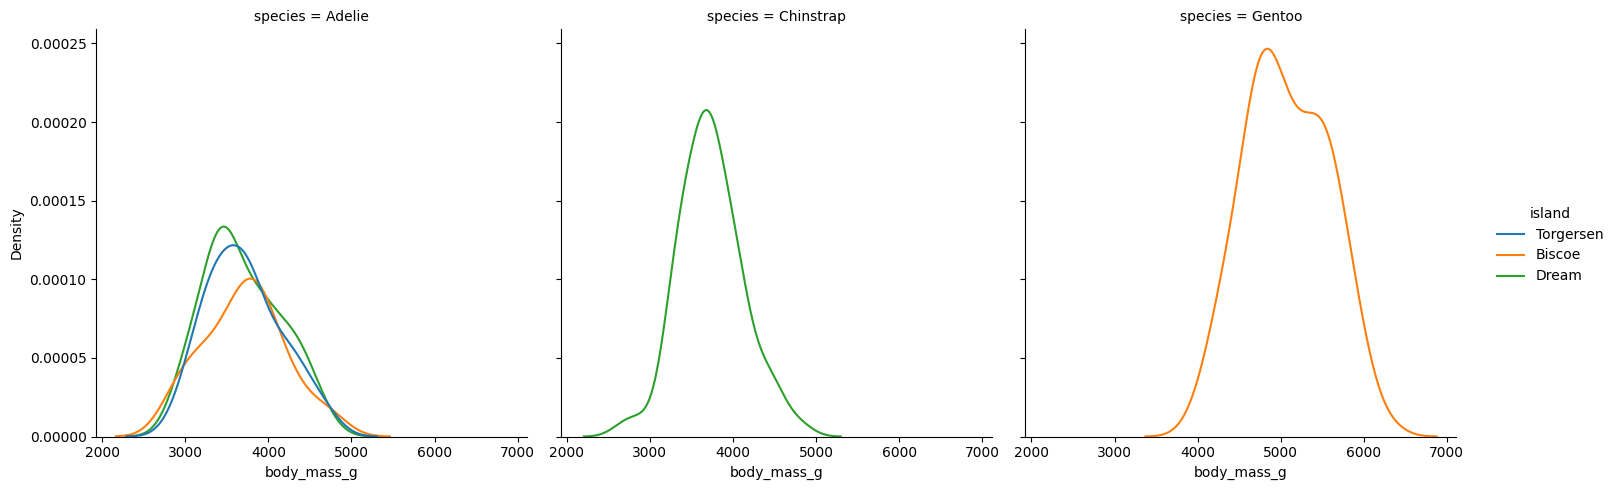

In [18]:
#### displot(2)
# distribution
sns.displot(data=penguins, x='body_mass_g', hue='island', col='species', kind='kde')

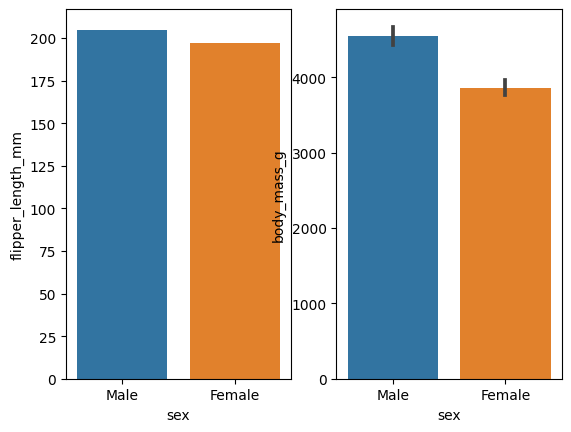

In [21]:
import matplotlib.pyplot as plt

# stateless 방법으로 subplot 지정 (행, 열)
f, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯 그리기
sns.barplot(data=penguins, x='sex', y='flipper_length_mm', ax=ax[0], errwidth=0)
# 두 번째 서브플롯 그리기
sns.barplot(data=penguins, x='sex', y='body_mass_g', ax=ax[1])
# 그래프 출력
plt.show()

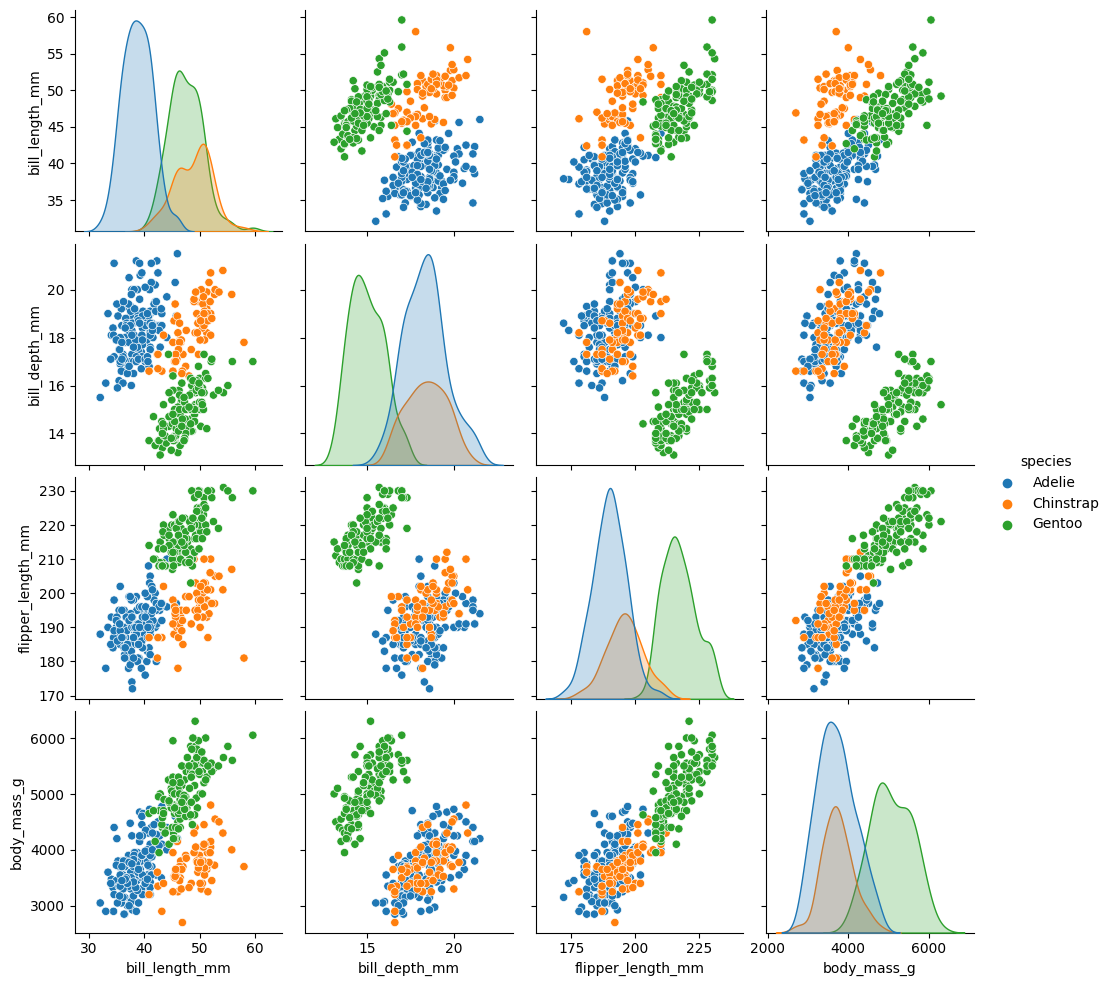

In [25]:
#### pairplot 
# 상관관계를 볼 수 있는 그래프
# 변수들 간의 상관관계를 한번에 보여줌 
# 상관관계: 수치형 데이터만

sns.pairplot(data=penguins, hue='species')

<ipython-input-26-6d03a66d7f5d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터만 있어야함


<Axes: xlabel='Task', ylabel='Model'>

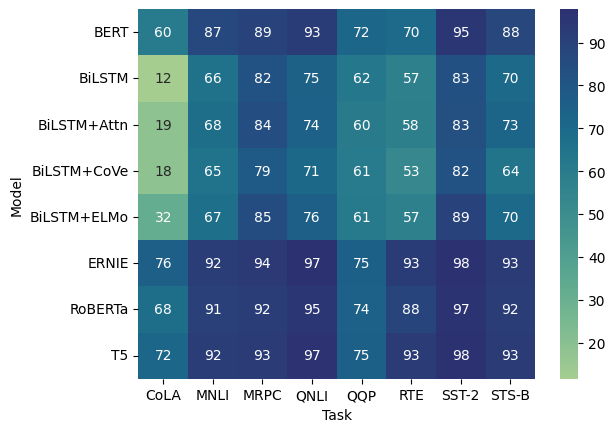

In [26]:
#### heatmap
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터만 있어야함
sns.heatmap(glue, annot=True, cmap='crest')

<ipython-input-40-6dd2b9da8c37>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins.corr(), annot=True, cmap='crest')


<Axes: >

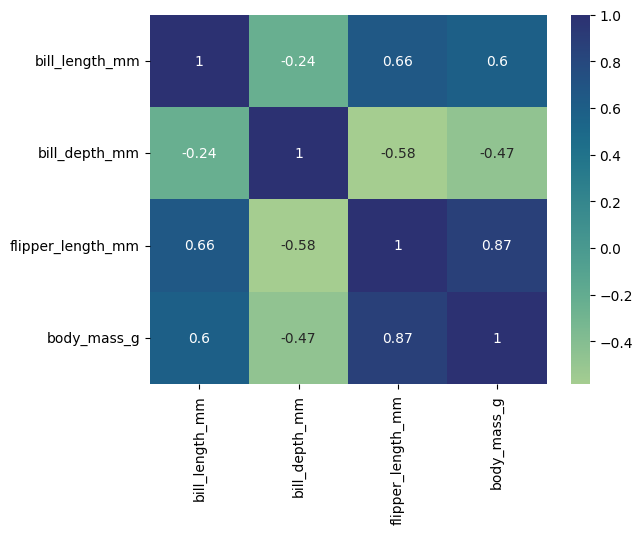

In [40]:
#### heatmap
# data = penguins.corr()
sns.heatmap(penguins.corr(), annot=True, cmap='crest')

# 상관관계

- 두 변수 간의 선형 관계(비례, 반비례)를 설명
- 상관관계에 있다고 해서 인과관계를 가지는 것은 아니다.
- -1 < r < 1, 1 혹은 -1 쪽으로 가까울수록 상관성이 높다고 말한다.

In [41]:
# 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는지, 어떻게 해석할 지가 중요함.

# 불러오고, 살펴보고, 전처리 > 상관관계 추가 

# IBM Attrition 데이터 (ibm_attrition.csv)

- IBM에서 만든 데이터 (가상 데이터)
- 변수(연봉, 직업만족도, ....) 
- 여러 변수 + 퇴사
- 연봉,만족도,가족,....,퇴사(o,x)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [43]:
!pip install koreanize_matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.1 MB/s eta 0:00:00


In [44]:
import koreanize_matplotlib

## 데이터 불러오기

In [104]:
df = pd.read_csv('ibm_attrition.csv')

In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 데이터 정보 확인


In [49]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [51]:
df.info() # 데이터 타입 -> int, float는 문제가 없음/ object는 확인이 필요하다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [52]:
# null 값 확인 
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 데이터 탐색


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# object 타입을 발견하면 -> 내가 어떤 형태로 변환을 해야하지않을까? 라는 고민은 해야한다. 
# object 인식이 어려운 경우가 많음 
# object가 2가지 즉 남/녀, 예스/노 이런 경우는 -> one-hot encoding(0, 1), object가 여러가지 경우면 -> labelencoding(0, 1, 2, 3, ...)


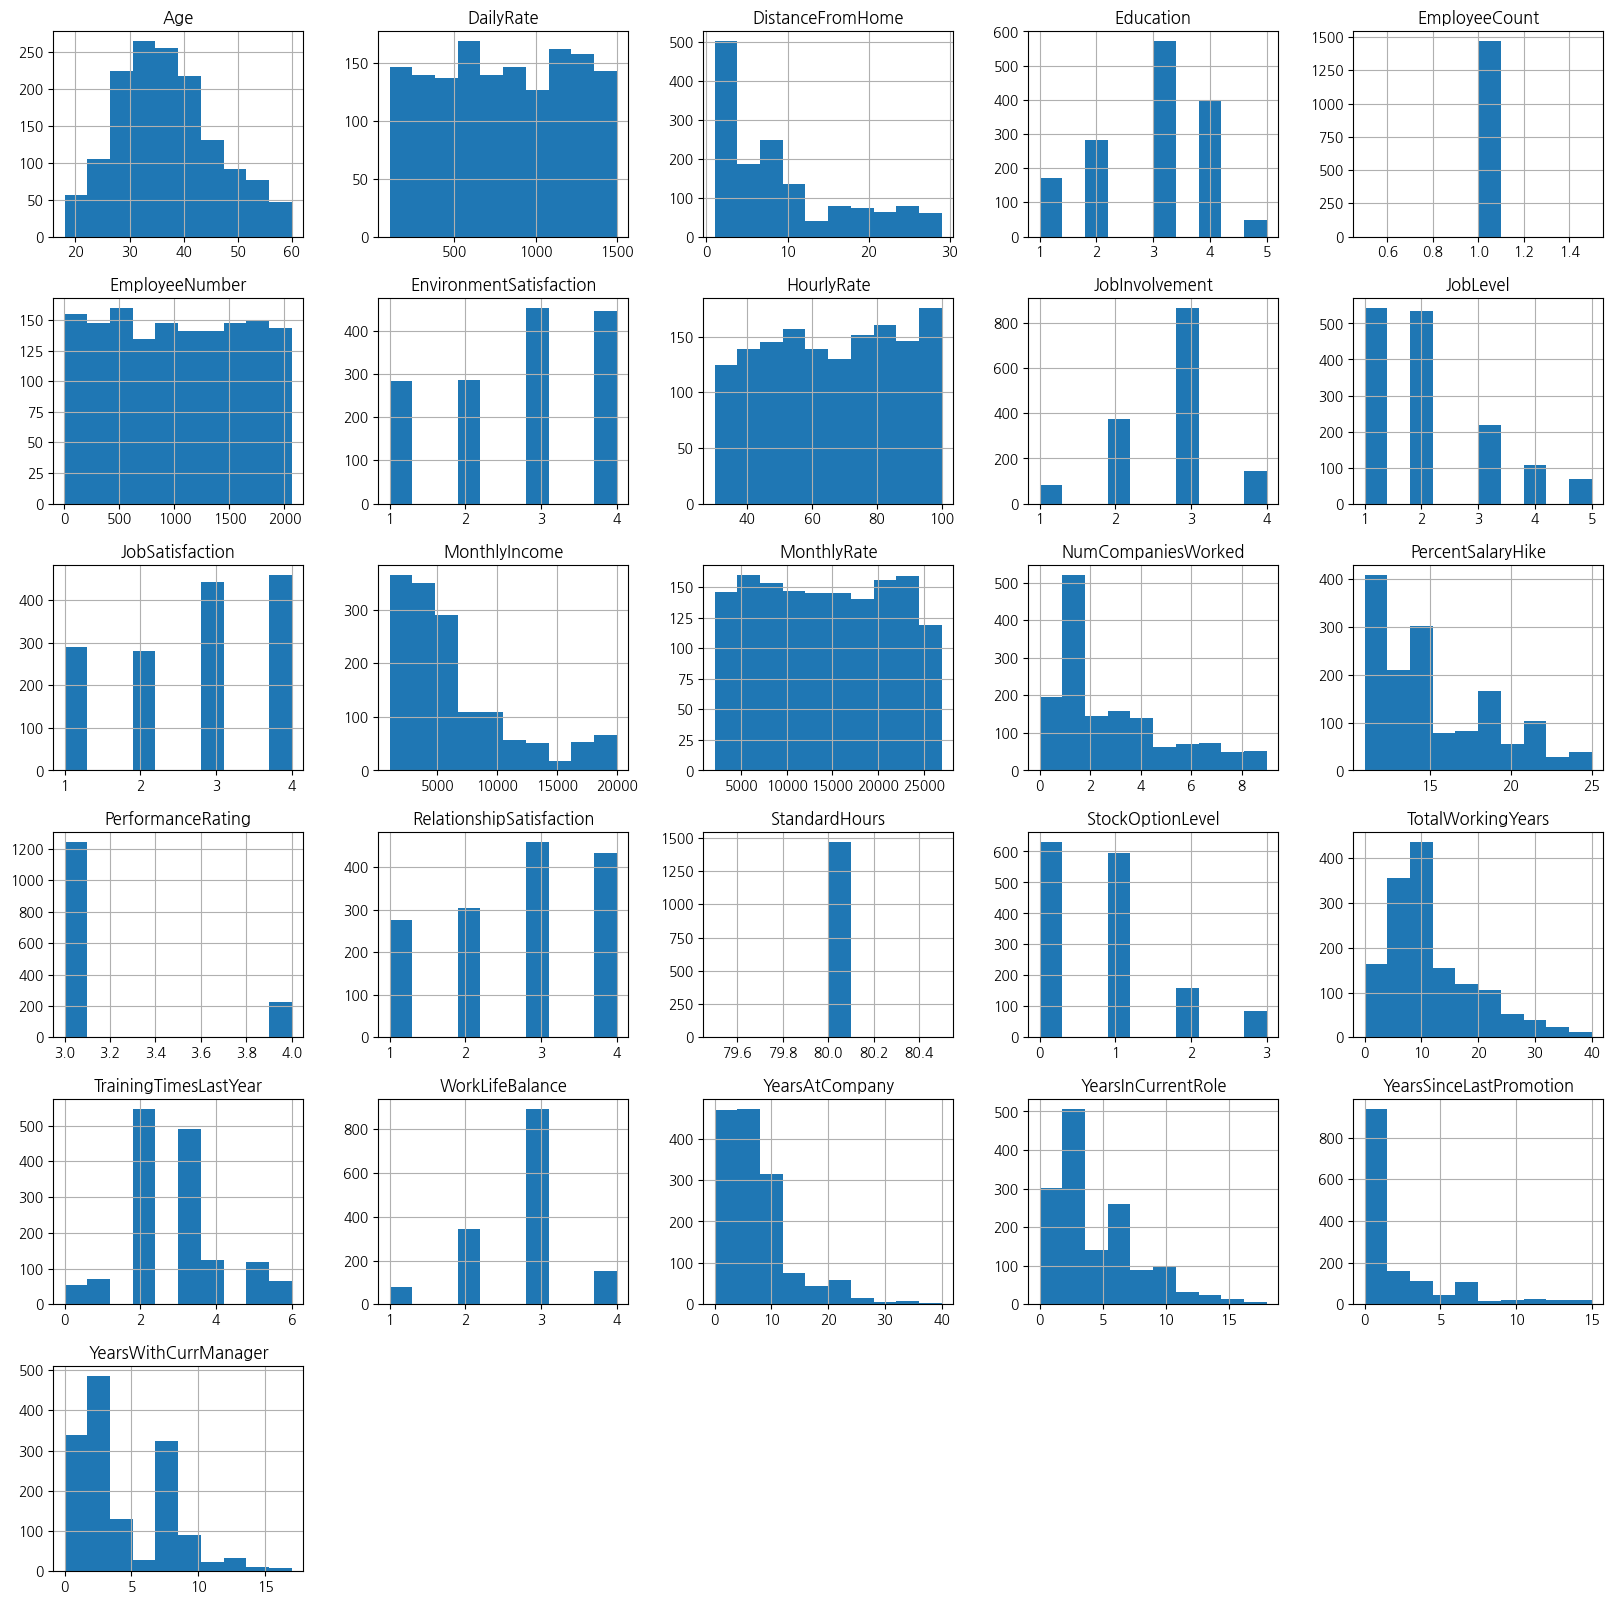

In [55]:
df.hist(figsize=(20, 20))
plt.show()

<ipython-input-86-9d020b89303f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.1f', annot=True) # 문자로된 컬럼들은 빠져있음.


<Axes: >

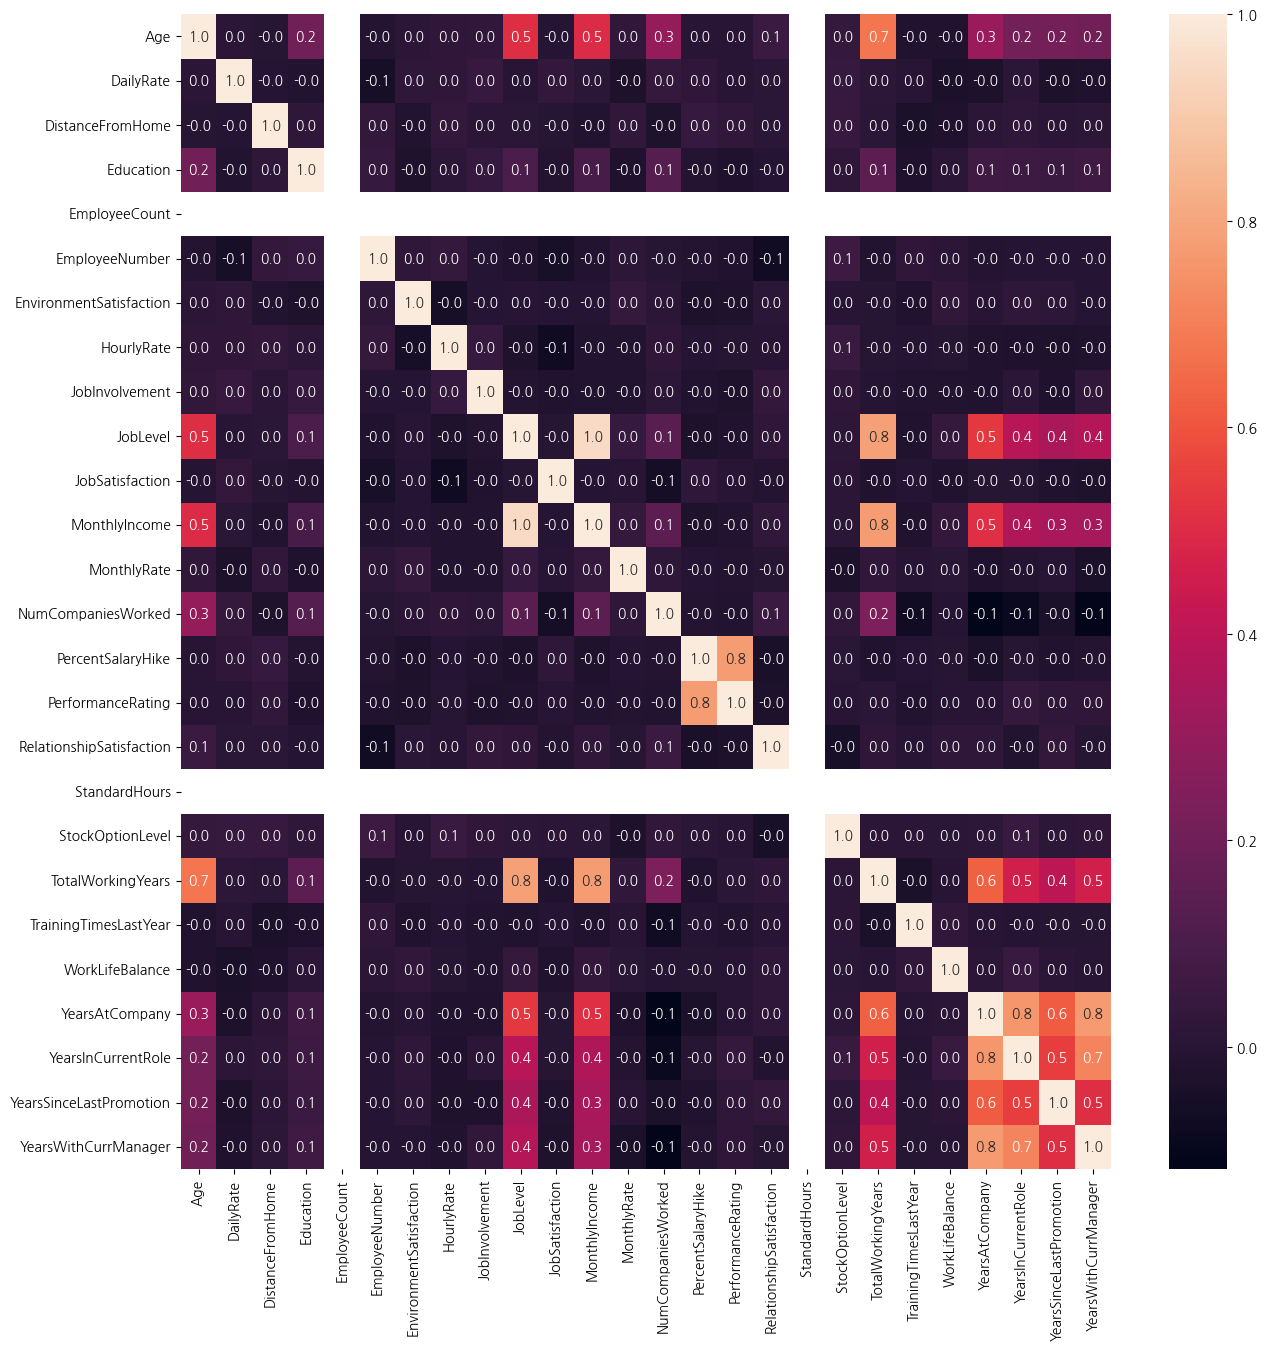

In [86]:
# 상관관계 파악 
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), fmt='.1f', annot=True) # 문자로된 컬럼들은 빠져있음.


# 높은 상관관계를 갖는 변수
# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

# 0.5 이상의 값들을 찾아주세요 (개별)

In [ ]:
# EmployeeCount

# StandardHours 

# 두 변수 열을 삭제하기.

In [105]:
# EmployeeCount, StandardHours 열 삭제하기.

df = df.drop(['EmployeeCount','StandardHours'], axis=1)

## 상관관계가 높은 변수들 위주로 데이터 탐색하기.

- 높은 상관관계를 갖는 변수
- PercentSalaryHike - PerformanceRating 0.8
- TotalWorkingYears - Age 0.7
- TotalWorkingYears - JobLevel 0.8
- YearsWithCurrManager - YearsAtCompany 0.8
- YearsWithCurrManager - YearsCurrentRole 0.7

### 퇴사한 인원, 퇴사를 하지않은 인원 

In [88]:
#### 퇴사한 인원, 퇴사하지 않은 인원 pie chart 그리기 (개별)

print(df['Attrition'].value_counts())

attrition_y = df['Attrition'][df['Attrition'] == 'Yes'].count()
attrition_n = df['Attrition'][df['Attrition'] == 'No'].count()
attrition_y_p = attrition_y/(df['Attrition'].count()) * 100
attrition_n_p = attrition_n/(df['Attrition'].count()) * 100
# 퇴사자는 237명
# 근무자는 1233명

No     1233
Yes     237
Name: Attrition, dtype: int64


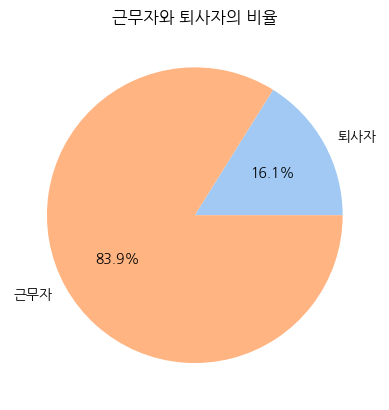

In [89]:
#### Pie Chart

colors = sns.color_palette('pastel')[:2]
plt.pie([attrition_y_p, attrition_n_p], labels=['퇴사자', '근무자'], autopct='%.1f%%', colors=colors)
plt.title('근무자와 퇴사자의 비율')
plt.show()

### 직업 레벨에 따른 퇴사비율 

In [90]:
df['JobLevel'].unique()

# 1:Entry, 2:Mid, 3:Senior, 4:Lead, 5:Excutive

array([2, 1, 3, 4, 5])

In [ ]:
# Mapping 1
# pandas Categorical 사용해서 새로운 카테고리 이름으로 적용
# df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])

# df['JobLevel'].value_counts()


In [106]:
# Mapping 2

# 타입을 str로 바꿔준다.
df['JobLevel'] = df['JobLevel'].astype(str)

level_mapping = {'1':' Entry', '2': 'Mid', '3': 'Senior', '4': 'Lead', '5': 'Excutive'}
df['JobLevel'] = df['JobLevel'].map(level_mapping)

In [107]:
df['JobLevel'].unique()

array(['Mid', ' Entry', 'Senior', 'Lead', 'Excutive'], dtype=object)

In [108]:
# attrition yes 중 joblevel를 확인
attrition_joblevel = df['JobLevel'][df['Attrition'] == 'Yes'].value_counts()

In [109]:
attrition_joblevel # 퇴사자들 중 레벨 분포 

 Entry      143
Mid          52
Senior       32
Excutive      5
Lead          5
Name: JobLevel, dtype: int64

In [110]:
df['JobLevel'].sort_values() # 값의 크기에 따라서 
# sort_values(ascending=True) 오름차순 

734      Entry
1149     Entry
1147     Entry
1141     Entry
539      Entry
         ...  
753     Senior
276     Senior
275     Senior
1031    Senior
297     Senior
Name: JobLevel, Length: 1470, dtype: object

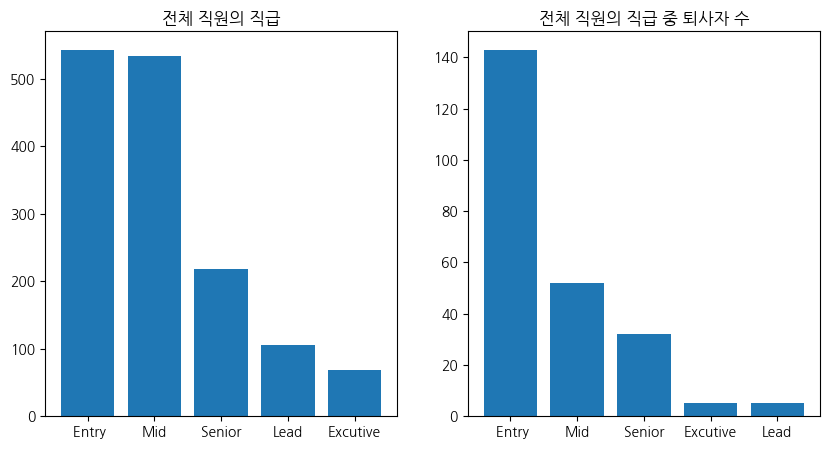

In [111]:
# 전체 레벨 분포의 막대 그래프

# df['JobLevel'].value_counts().index # x
# df['JobLevel'].value_counts() # y


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(df['JobLevel'].value_counts().index, df['JobLevel'].value_counts())
plt.title('전체 직원의 직급')
# attrition_joblevel.index # x
# attrition_joblevel # y
plt.subplot(1, 2, 2)
plt.bar(attrition_joblevel.index, attrition_joblevel)
plt.title('전체 직원의 직급 중 퇴사자 수')
plt.show()

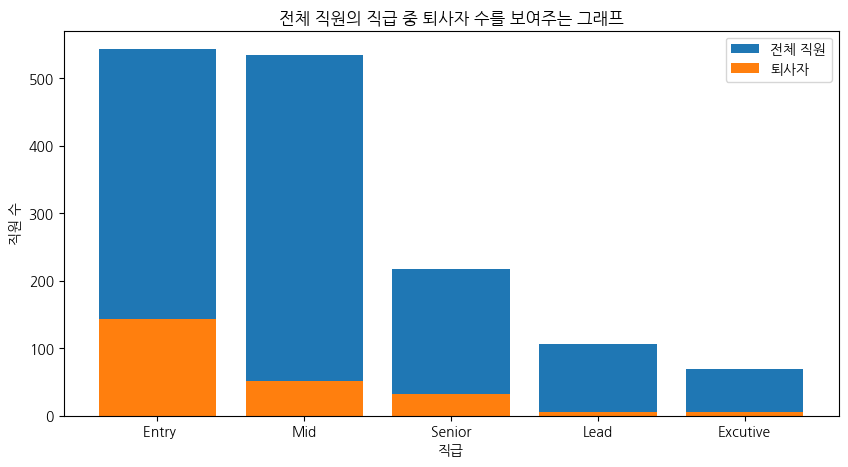

In [112]:
# 전체 레벨 분포의 막대 그래프

# df['JobLevel'].value_counts().index # x
# df['JobLevel'].value_counts() # y

plt.figure(figsize=(10, 5))


plt.bar(df['JobLevel'].value_counts().index, df['JobLevel'].value_counts(), label = '전체 직원')
# attrition_joblevel.index # x
# attrition_joblevel # y
plt.bar(attrition_joblevel.index, attrition_joblevel, label = '퇴사자')
plt.legend(loc='best')
plt.title('전체 직원의 직급 중 퇴사자 수를 보여주는 그래프')
plt.xlabel('직급')
plt.ylabel('직원 수')

plt.show()

In [ ]:
# seaborn으로 구현(개별)


### 나이에 따른 퇴사 비율 

- 변수: Age, Attrition

In [113]:
# 나이에 따른 퇴사 비율

df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [114]:
# 나이대 구간 별로 나누기 

# 구간 별로 카운팅 

df['Age'].describe()
# 10대~ 60대까지 존재함 

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [115]:
df['Age'][(df['Age'] >= 10) & (df['Age'] < 20)]
# df['Age'][(df['Age'] >= 20) & (df['Age'] < 30)]
# df['Age'][(df['Age'] >= 30) & (df['Age'] < 40)]



127     19
149     19
171     19
177     19
296     18
301     18
422     19
457     18
688     19
727     18
828     18
853     19
892     19
909     19
972     18
1153    18
1311    18
Name: Age, dtype: int64

In [116]:
# 나이대 구간 별로 나누기 
# df['첫번째자리'] = df['나이'].astype(str).str[0]
df['Age'].astype(str).str[0]

0       4
1       4
2       3
3       3
4       2
       ..
1465    3
1466    3
1467    2
1468    4
1469    3
Name: Age, Length: 1470, dtype: object

In [117]:
df['Ages'] = df['Age'].astype(str).str[0]

In [118]:
ages_interval_count = df['Ages'].value_counts().sort_index()

df['Ages'].value_counts().sort_index()

1     17
2    309
3    622
4    349
5    168
6      5
Name: Ages, dtype: int64

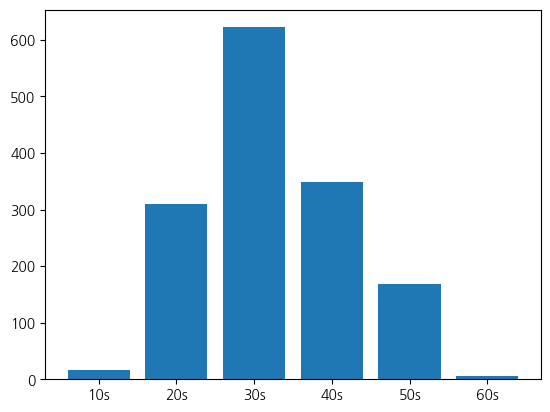

In [119]:
plt.bar(['10s', '20s', '30s', '40s', '50s', '60s'], ages_interval_count)
plt.show()

In [120]:
ages_interval_attrition_count = df['Ages'][df['Attrition'] == 'Yes'].value_counts().sort_index()

df['Ages'][df['Attrition'] == 'Yes'].value_counts().sort_index()

1    10
2    81
3    89
4    34
5    23
Name: Ages, dtype: int64

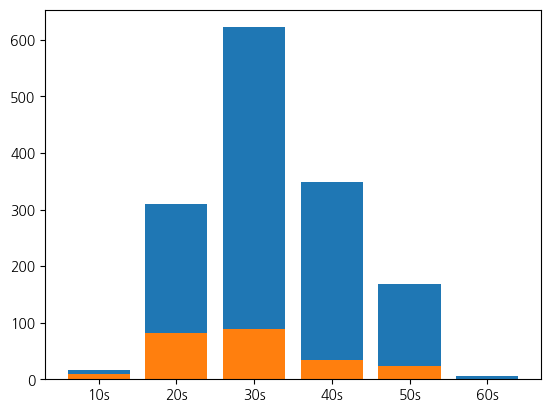

In [121]:
# 전체 나이대 근무자 대비 나이대 별 퇴사자 수

plt.bar(['10s', '20s', '30s', '40s', '50s', '60s'], ages_interval_count)

plt.bar(['10s', '20s', '30s', '40s', '50s'], ages_interval_attrition_count)

plt.show()

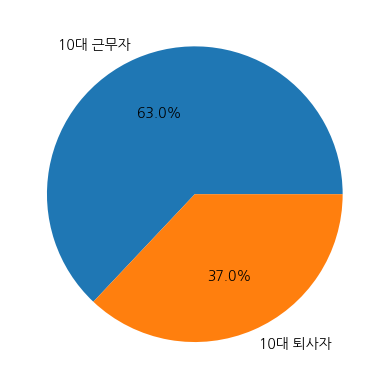

In [122]:
# 10대 근무자들의 퇴사율 (파이차트)

ages_interval_10_count = df['Ages'][df['Ages'] == '1'].value_counts() # 전체 10대 근무자 수 
ages_interval_10_attrition_count = df['Ages'][(df['Ages'] == '1') & (df['Attrition'] == 'Yes')].value_counts() # 10대 퇴사자 수 

# 전체 10대 근무자 중 퇴사자가 아닌 10대 근무자 비율 
ages_interval_10_count_p = ages_interval_10_count/(ages_interval_10_attrition_count + ages_interval_10_count) * 100
# 전제 10대 근무자 중 10대 퇴사자 비율 
ages_interval_10_attrition_count_p = 100 - ages_interval_10_count_p

# 파이 차트로 시각화 
plt.pie([ages_interval_10_count_p[0], ages_interval_10_attrition_count_p[0]], autopct='%.1f%%', labels=['10대 근무자', '10대 퇴사자'])

plt.show()

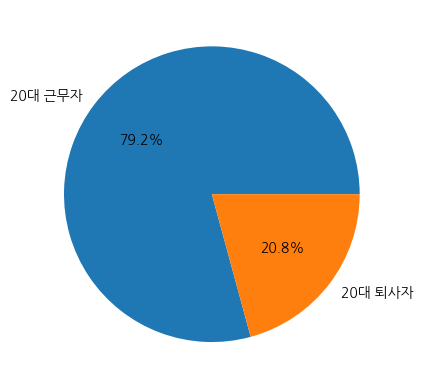

In [123]:
# 20대 근무자들의 퇴사율 (파이차트)

ages_interval_20_count = df['Ages'][df['Ages'] == '2'].value_counts() # 전체 20대 근무자 수 
ages_interval_20_attrition_count = df['Ages'][(df['Ages'] == '2') & (df['Attrition'] == 'Yes')].value_counts() # 20대 퇴사자 수 

# 전체 20대 근무자 중 퇴사자가 아닌 20대 근무자 비율 
ages_interval_20_count_p = ages_interval_20_count/(ages_interval_20_attrition_count + ages_interval_20_count) * 100
# 전제 20대 근무자 중 20대 퇴사자 비율 
ages_interval_20_attrition_count_p = 100 - ages_interval_20_count_p

# 파이 차트로 시각화 
plt.pie([ages_interval_20_count_p[0], ages_interval_20_attrition_count_p[0]], autopct='%.1f%%', labels=['20대 근무자', '20대 퇴사자'])

plt.show()

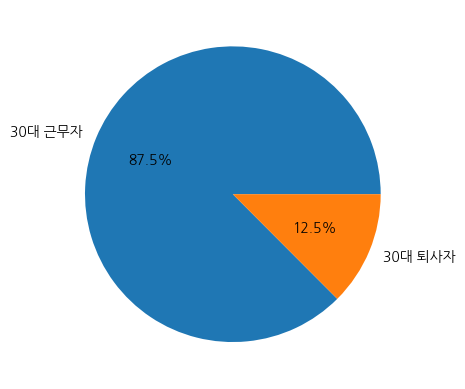

In [124]:
# 30대 근무자들의 퇴사율 (파이차트)

ages_interval_30_count = df['Ages'][df['Ages'] == '3'].value_counts() # 전체 30대 근무자 수 
ages_interval_30_attrition_count = df['Ages'][(df['Ages'] == '3') & (df['Attrition'] == 'Yes')].value_counts() # 30대 퇴사자 수 

# 전체 30대 근무자 중 퇴사자가 아닌 30대 근무자 비율 
ages_interval_30_count_p = ages_interval_30_count/(ages_interval_30_attrition_count + ages_interval_30_count) * 100
# 전제 30대 근무자 중 30대 퇴사자 비율 
ages_interval_30_attrition_count_p = 100 - ages_interval_30_count_p

# 파이 차트로 시각화 
plt.pie([ages_interval_30_count_p[0], ages_interval_30_attrition_count_p[0]], autopct='%.1f%%', labels=['30대 근무자', '30대 퇴사자'])

plt.show()

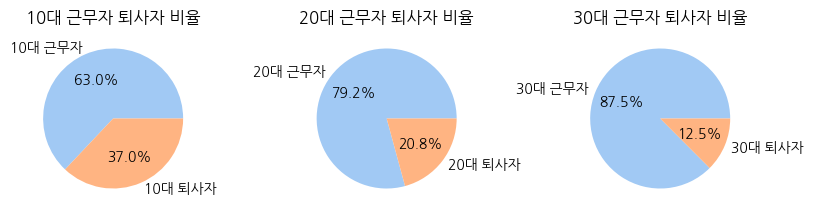

In [125]:
# 10대 + 20대 + 30대 파이 차트 비교 

plt.figure(figsize=(10, 5))
colors = sns.color_palette('pastel')[:2]

plt.subplot(2, 3, 1)
plt.pie([ages_interval_10_count_p[0], ages_interval_10_attrition_count_p[0]],colors=colors ,autopct='%.1f%%', labels=['10대 근무자', '10대 퇴사자'])
plt.title('10대 근무자 퇴사자 비율')

plt.subplot(2, 3, 2)
plt.pie([ages_interval_20_count_p[0], ages_interval_20_attrition_count_p[0]],colors=colors, autopct='%.1f%%', labels=['20대 근무자', '20대 퇴사자'])
plt.title('20대 근무자 퇴사자 비율')

plt.subplot(2, 3, 3)
plt.pie([ages_interval_30_count_p[0], ages_interval_30_attrition_count_p[0]],colors=colors, autopct='%.1f%%', labels=['30대 근무자', '30대 퇴사자'])
plt.title('30대 근무자 퇴사자 비율')

plt.show()

# 나이가 어린 근무자 일수록 퇴사 비율이 높다.

In [126]:
# df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])
# 맵핑을 한번해봅시다.
# 이것을 맵핑이라 한다.

level_mapping = {"1": "10's", "2": "20's", "3": "30's", "4": "40's", "5": "50's", "6": "60's" }
df['Ages'] = df['Ages'].map(level_mapping)
df['Ages'].unique()

array(["40's", "30's", "20's", "50's", "10's", "60's"], dtype=object)

### 직급에 따른 평균 연봉 

- 변수: JobLevel, MonthlyIncome

In [127]:
# MonthlyIncome 컬럼의 데이터 타입 확인
df['MonthlyIncome'].dtype

dtype('int64')

In [128]:
# 연봉 컬럼을 만들어준다.
df['AnnualSalary'] = df['MonthlyIncome'] * 12

In [129]:
# 직급별 평균 연봉 
job_annual_salary = round(df.groupby('JobLevel')['AnnualSalary'].mean(), 2)

In [138]:
job_annual_salary.sort_values()

JobLevel
 Entry       33442.98
Mid          66027.33
Senior      117807.03
Lead        186045.40
Excutive    230301.91
Name: AnnualSalary, dtype: float64

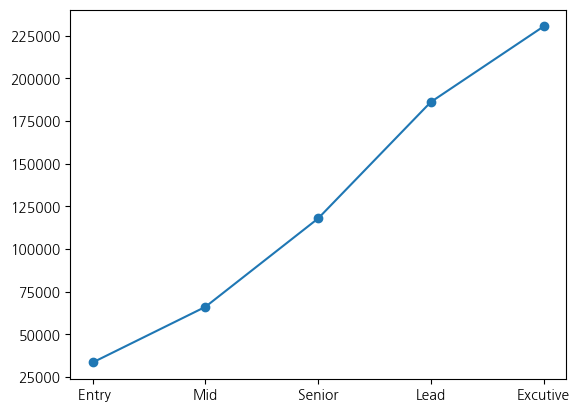

In [139]:
# line graph 
# 연속된 값이 아니기 때문에 선 그래프가 적절하지 않다.
plt.plot(job_annual_salary.sort_values(), 'o-')
plt.show()

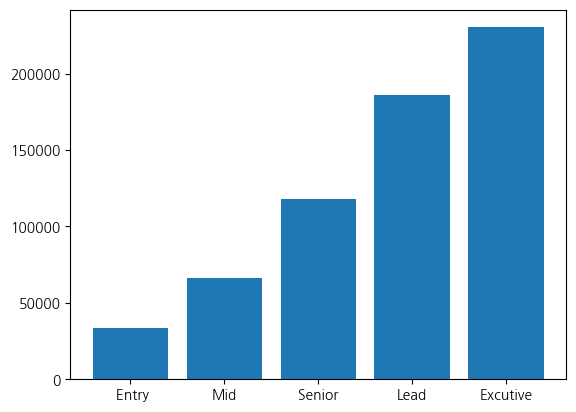

In [141]:
# bar graph

plt.bar(job_annual_salary.sort_values().index, job_annual_salary.sort_values())
plt.show()

<Axes: xlabel='JobLevel', ylabel='AnnualSalary'>

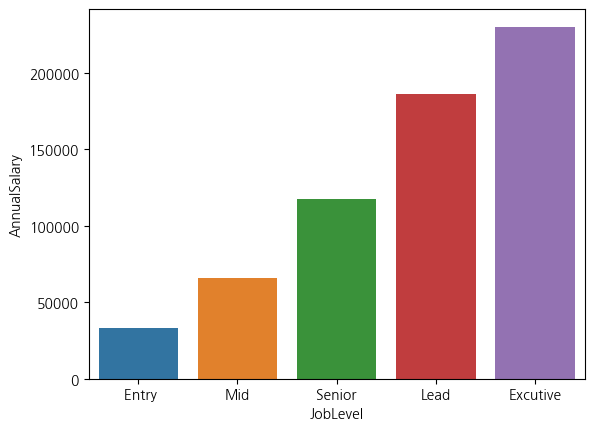

In [142]:
sns.barplot(x=job_annual_salary.sort_values().index, y=job_annual_salary.sort_values())


<Axes: xlabel='JobLevel', ylabel='AnnualSalary'>

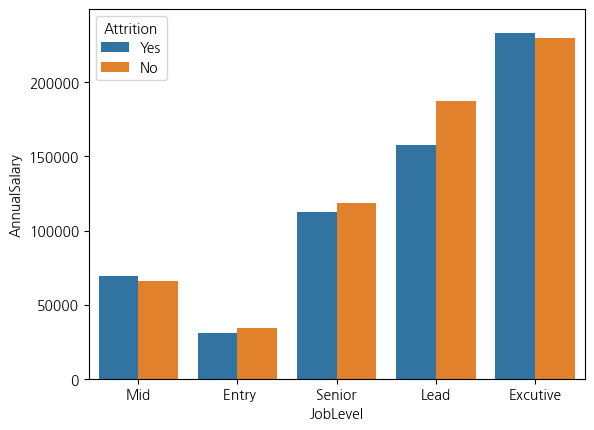

In [134]:
sns.barplot(data=df, x='JobLevel', y='AnnualSalary', hue='Attrition', errwidth=0)

### 성별에 따른 퇴사 비율 

- 변수: Gender, Attrition

In [144]:
#### 성별에 따른 퇴사 비율 (퇴사자 중 남녀성비)

df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [145]:
attrition_gender = df['Gender'][df['Attrition'] == 'Yes']
attrition_gender.value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

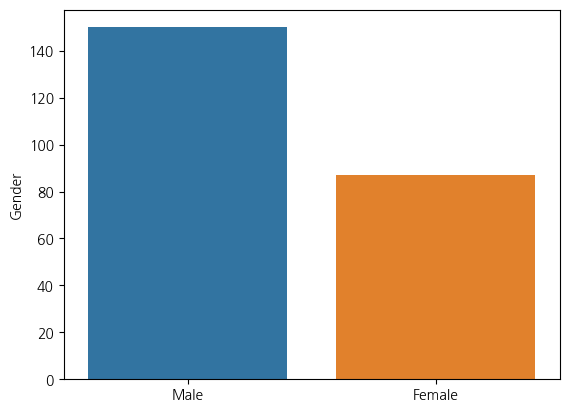

In [146]:
sns.barplot(x=attrition_gender.value_counts().index, y=attrition_gender.value_counts())

In [147]:
# groupby -> 자습
# one-hot encoding: 텍스트(범주형) -> 숫자
# 남/녀, 정상/비정상, 오전/오후 ...
# 0/1
# Gender Male(0), Female(1)

# 1. 판다스에서 제공하는 get_dummies
# pd.get_dummies(df, columns=[])
oh_gender = pd.get_dummies(df, columns=['Gender'])
oh_gender['Gender_Female'][oh_gender['Gender_Female'] == 1].count()   # .notnull().sum() 값이 있는 것 확인할 때 (null 아닌 값)
# gender 별 분류 -> 성별 카운팅 가능

588

In [ ]:
oh_gender['Gender_Male'][oh_gender['Gender_Male'] == 1].count() 

In [ ]:
# Scikitlearn


### 연봉에 따른 퇴사 비율

### 연차에 따른 퇴사 비율